<a href="https://colab.research.google.com/github/josepeon/python_dad_class/blob/main/Intro_to_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks: Introduction to Neural Nets for Regression and Classification


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

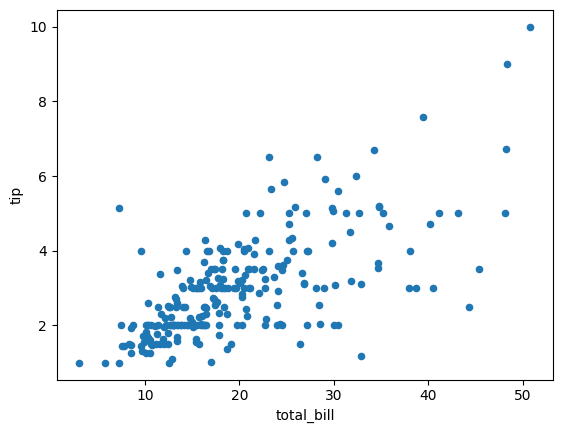

In [4]:
tips.plot.scatter(x = 'total_bill', y = 'tip')

## Building the network with pytorch

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

In [6]:
neuron = nn.Linear(in_features=1, out_features=1)

In [7]:
list(neuron.parameters())

[Parameter containing:
 tensor([[-0.9224]], requires_grad=True),
 Parameter containing:
 tensor([-0.9814], requires_grad=True)]

In [8]:
X = torch.tensor(tips[['total_bill']].values, dtype=torch.float32)

In [9]:
#scale the data
X =( X - X.mean() )/ X.std()

In [10]:
X.shape

torch.Size([244, 1])

In [12]:
neuron(X) #pedictions for tips

tensor([[-6.9167e-01],
        [-2.6808e-03],
        [-1.1082e+00],
        [-1.3848e+00],
        [-1.4791e+00],
        [-1.5516e+00],
        [ 1.5998e-01],
        [-1.7164e+00],
        [-4.8964e-01],
        [-4.6270e-01],
        [ 4.5716e-03],
        [-2.5846e+00],
        [-5.2901e-01],
        [-8.4087e-01],
        [-4.6788e-01],
        [-1.1672e+00],
        [-1.6447e-03],
        [-6.1915e-01],
        [-6.8960e-01],
        [-1.0709e+00],
        [-7.8803e-01],
        [-1.0336e+00],
        [-5.6527e-01],
        [-3.0156e+00],
        [-9.8488e-01],
        [-7.7663e-01],
        [-3.1661e-01],
        [-2.4616e-01],
        [-1.1797e+00],
        [-9.6727e-01],
        [ 7.9169e-02],
        [-8.3258e-01],
        [-4.9171e-01],
        [-1.0750e+00],
        [-7.7352e-01],
        [-1.4242e+00],
        [-6.2122e-01],
        [-6.8546e-01],
        [-8.6780e-01],
        [-2.1712e+00],
        [-5.9324e-01],
        [-7.4037e-01],
        [-3.7567e-01],
        [ 6

In [18]:
activation = nn.ReLU()

In [19]:
loss_function = nn.MSELoss()

In [20]:
y = torch.tensor(tips[['tip']].values, dtype=torch.float32)

In [21]:
activation(neuron(X))

tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.1600],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0046],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0792],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0657],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0025],
        [0.0000],
        [0.0388],
        [0.0000],
        [0

In [22]:
model = nn.Sequential(neuron, activation)

In [23]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.9224]], requires_grad=True),
 Parameter containing:
 tensor([-0.9814], requires_grad=True)]

In [24]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [25]:
#step 1: pass data through the model
yhat = model(X)

In [26]:
#relu(weight x bill + bias)
yhat

tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.1600],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0046],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0792],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0657],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0025],
        [0.0000],
        [0.0388],
        [0.0000],
        [0

In [27]:
loss = loss_function(y, yhat)

In [28]:
loss

tensor(10.8462, grad_fn=<MseLossBackward0>)

In [29]:
optimizer.zero_grad()

In [30]:
loss.backward()

In [32]:
optimizer.step()

In [33]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.9297]], requires_grad=True),
 Parameter containing:
 tensor([-0.9753], requires_grad=True)]

In [34]:
#list to keep track of errors
losses = []
#train the network 1000 times (iterations)
for epoch in range(1000):
  #pass the data through the network
  yhat = model(X)
  #evaluate the error in predictions
  loss = loss_function(y, yhat)
  #clear out gradients and backpropogate loss (wiggle weights)
  optimizer.zero_grad()
  loss.backward()
  #track the error
  losses.append(loss.item())
  #weights and biases get adjusted/updated
  optimizer.step()

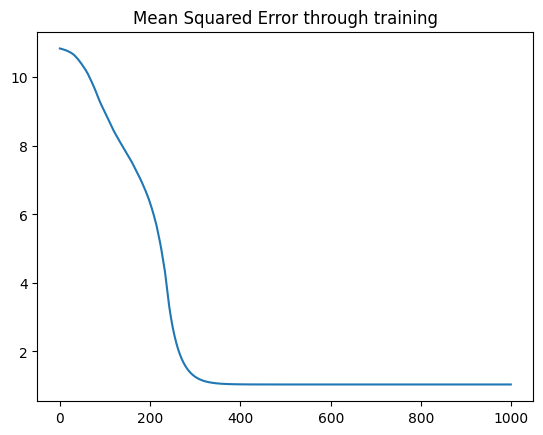

In [35]:
plt.plot(losses)
plt.title('Mean Squared Error through training');

In [36]:
model(X[:10])

tensor([[2.7046],
        [2.0062],
        [3.1268],
        [3.4072],
        [3.5028],
        [3.5763],
        [1.8413],
        [3.7433],
        [2.4998],
        [2.4725]], grad_fn=<ReluBackward0>)

In [37]:
y[:10]

tensor([[1.0100],
        [1.6600],
        [3.5000],
        [3.3100],
        [3.6100],
        [4.7100],
        [2.0000],
        [3.1200],
        [1.9600],
        [3.2300]])

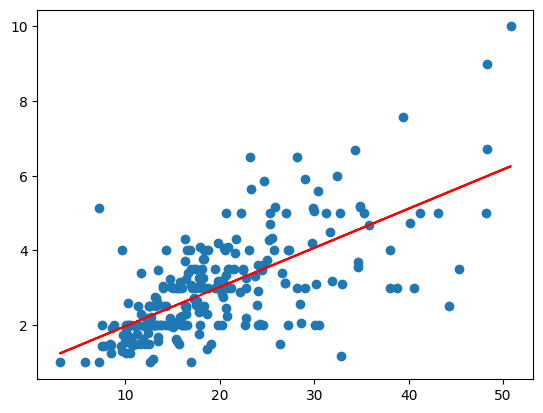

In [38]:
plt.scatter(tips['total_bill'], tips['tip'])
plt.plot(tips['total_bill'], yhat.detach().numpy(), '-r')

**PROBLEM**

Use the diabetes data below to build a neural net for regression.

In [39]:
from sklearn.datasets import load_diabetes

In [40]:
diabetes = load_diabetes(as_frame = True).frame
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [41]:
X = torch.tensor(diabetes.iloc[:, :-1].values, dtype = torch.float32)
y = torch.tensor(diabetes[['target']].values, dtype = torch.float32)

In [42]:
X.shape

torch.Size([442, 10])

In [43]:
model = nn.Sequential(nn.Linear(in_features = 10, out_features=1), nn.ReLU())
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [44]:
#list to keep track of errors
losses = []
#train the network 1000 times (iterations)
for epoch in range(1000):
  #pass the data through the network
  yhat = model(X)
  #evaluate the error in predictions
  loss = loss_function(y, yhat)
  #clear out gradients and backpropogate loss (wiggle weights)
  optimizer.zero_grad()
  loss.backward()
  #track the error
  losses.append(loss.item())
  #weights and biases get adjusted/updated
  optimizer.step()

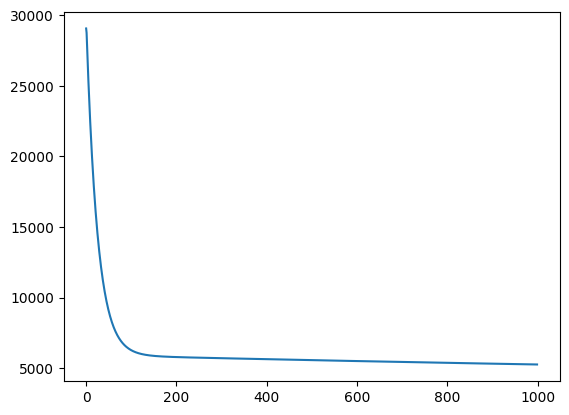

In [45]:
plt.plot(losses)

## Binary Classification

In this situation, we are predicting a binary category.  In the example below, we examine whether or not a tumor is cancerous (class 0) or benign (class 1).  We use all 30 features to predict the `target` column.  The primary differences here are:

- Activation function at end of network is `nn.Sigmoid`
- Loss function is `nn.BCELoss()`

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer(as_frame=True).frame

In [ ]:
cancer.head()

In [ ]:
model = nn.Sequential(nn.Linear(in_features=30, out_features=1), nn.Sigmoid())

In [ ]:
X = cancer.drop('target', axis = 1).values
y = cancer[['target']].values

In [ ]:
X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)

In [ ]:
loss_function = nn.BCELoss() #binary classification loss

In [ ]:
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [ ]:
X = (X - X.mean())/X.std()

In [ ]:
losses = []
for epoch in range(1000):
  yhat = model(X)
  loss = loss_function(yhat, y)
  optimizer.zero_grad()
  loss.backward()
  losses.append(loss.item())
  optimizer.step()

In [ ]:
plt.plot(losses);

In [ ]:
model(X)[:10] #output of model is probability something is a 1

In [ ]:
predictions = torch.where(model(X) > .5, 1, 0)

In [ ]:
predictions[:5]

In [ ]:
y[:5]

In [ ]:
(y == predictions).sum()/len(y)

**PROBLEM**

Use the orange vs. grapefruit dataset below to build a neural network for classification.

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
fruit = fetch_openml(data_id=43387).frame

In [ ]:
fruit.head()

In [ ]:
fruit.info()

In [ ]:
import numpy as np
X = torch.tensor(fruit.iloc[:, 1:].values, dtype = torch.float32)
y_binary = np.where(fruit[['name']].values == 'orange', 1, 0)

In [ ]:
y_binary

In [ ]:
y = torch.tensor(y_binary, dtype = torch.float32)

In [ ]:
#model??
model = nn.Sequential(nn.Linear(in_features = 5, out_features=1), nn.Sigmoid())
loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [ ]:
X = (X - X.mean())/X.std()

In [ ]:
losses = []
for epoch in range(1000):
  yhat = model(X)
  loss = loss_function(yhat, y)
  optimizer.zero_grad()
  loss.backward()
  losses.append(loss.item())
  optimizer.step()

In [ ]:
plt.plot(losses)

In [ ]:
yhat = torch.where(model(X) > .5, 1, 0)

In [ ]:
(yhat == y).sum()/len(y)

In [ ]:
torch.cuda.is_available()

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
device

In [ ]:
X = X.to(device)

## Multi-class classification

In [ ]:
from torchvision.datasets import MNIST

In [ ]:
train = MNIST('.', download = True)

In [ ]:
plt.imshow(train[0][0])

In [ ]:
from torchvision.transforms import ToTensor, Normalize, Compose
from torch.utils.data import DataLoader

In [ ]:
#turn image into pytorch tensor
#then scale the tensor
transform = Compose([ToTensor(), Normalize(mean = (0.5), std = (0.5))])

In [ ]:
train = MNIST('.', download = True, transform=transform)

In [ ]:
train

In [ ]:
#create smaller batches of data for training
trainloader = DataLoader(train, batch_size=24)

In [ ]:
model = nn.Sequential(nn.Flatten(),
                      nn.Linear(in_features = 28*28, out_features=100),
                      nn.ReLU(),
                      nn.Linear(100, 10))

In [ ]:
loss_function = nn.CrossEntropyLoss()

In [ ]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
losses = []
for epoch in range(10):
  for X, y in trainloader:
    yhat = model(X)
    loss = loss_function(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  losses.append(loss.item())

In [ ]:
plt.plot(losses)

In [ ]:
correct = 0
total = 0
for X, y in trainloader:
  yhat = torch.argmax(model(X), dim = 1)
  correct += (y == yhat).sum()
  total += len(y)

In [ ]:
correct/total

In [ ]:
y

### Train it on the GPU

In [ ]:
device = 'cuda'

In [ ]:
#move everything to the GPU
model = model.to(device)
losses = []
for epoch in range(20):
  for X, y in trainloader:
    X =  X.to(device)
    y = y.to(device)
    yhat = model(X)
    loss = loss_function(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  losses.append(loss.item())

In [ ]:
plt.plot(losses)

In [ ]:
model

In [ ]:
correct = 0
total = 0
for X, y in trainloader:
  X =  X.to(device)
  y = y.to(device)
  yhat = torch.argmax(model(X), dim = 1)
  correct += (y == yhat).sum()
  total += len(y)

In [ ]:
correct/total